In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
#Checking for missing values:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values are there.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Statistical Measure:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

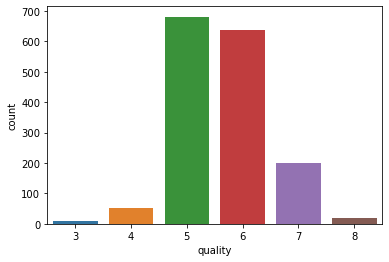

In [7]:
#Number of values for each quality:
sns.countplot(x="quality",data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

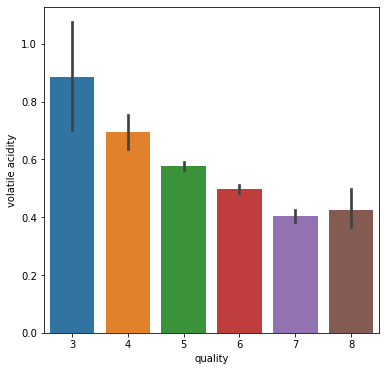

In [8]:
#Volatile Acidity vs Quality:
plt.figure(figsize=(6,6))
sns.barplot(x="quality",y="volatile acidity",data=df)

After analysing the above graph, It is known that the lower the "volatile acidity" , quality of wine will be good.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

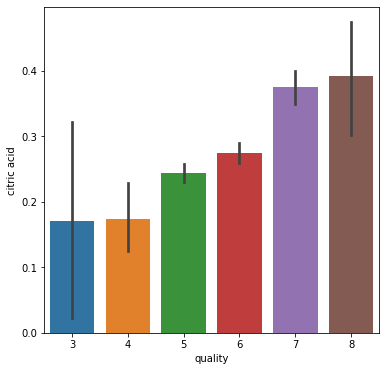

In [9]:
#citric acid vs Quality:
plt.figure(figsize=(6,6))
sns.barplot(x="quality",y="citric acid",data=df)

After analysing the above graph, It is known that the higher the "citric acid" , quality of wine will be good.

### Correlation : Which column is directly proportional to "Quality"
### Positive Correlation 
### Negative Correlation

In [10]:
correlation=df.corr()

<AxesSubplot:>

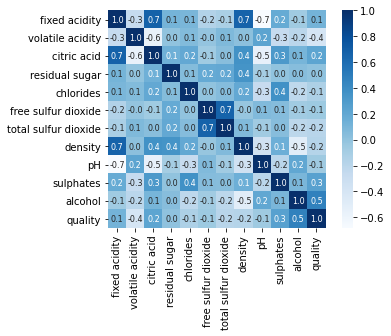

In [11]:
#Constructing the Heat Map to understand the correlation between the columns:
# plt.figure(figsize=(6,6)
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")
#cbar-->It gives the bar at the right hand side, which tells how much the correlation is.
#square-->All is in the square form.
#fmt=".1f"--->It gives the one decimal place.
#annaot--->It provides the name of the column at the left hand side.
#annot_kws--->It gives the size of the annot(gives the size of the column names).
#cmap--->Which color you want in the heatmap.

After Analysing the above heat map, We have to ignore the diagonal because they are comparing the same column names (means the values are not significant, but others are significant), so firstly we have to see the "Quality" column, so in "Quality" column , we have to see which is highly correlated or which has darker color, when we compare it to the "cbar", so we come to conclusion that "Alcohol" is highly correlated (Positive correlated) and "volatile acidity" is highly negative correlated.

### Data Pre-Processing:

In [12]:
#Separate the data and label:
X=df.drop(columns="quality",axis=1)
#Label Binarisation: 
Y=df["quality"].apply(lambda x: 1 if x>=7 else 0)

In [13]:
Y=Y.to_frame()

In [14]:
#Separate the data in training and testing :
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
print("Shape of the X_train: ",X_train.shape)
print("Shape of the X_test: ",X_test.shape)
print("Shape of the Y_train: ",Y_train.shape)
print("Shape of the Y_test: ",Y_test.shape)

Shape of the X_train:  (1119, 11)
Shape of the X_test:  (480, 11)
Shape of the Y_train:  (1119, 1)
Shape of the Y_test:  (480, 1)


In [15]:
#Model Training: Random Forest Classifier:
model=RandomForestClassifier()

In [16]:
model.fit(X_train,Y_train)

<ipython-input-16-ffa49499a3bf>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier()

In [17]:
#Model Evaluation: Accuracy Score.
X_test_pred=model.predict(X_test)
X_test_accuracy=accuracy_score(X_test_pred,Y_test)
print("Accuracy: ",X_test_accuracy)

Accuracy:  0.9166666666666666


## Building a Predictive System:

In [26]:
# input_data=(8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5)
input_data=(8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5)

#Changing the input data to a numpy array:
input_data_as_numpy_array=np.asarray(input_data)

#Reshape the data as we are predicting the label for only one instance:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

[1]
Good Quality Wine
